In [8]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect("cosmetics.db")


In [3]:
df = pd.read_sql("SELECT * FROM cosmetics_clean", conn)


In [4]:
df.head()


,category,brand,product_name,price,rating,ingredients,combination,dry,normal,oily,sensitive,skin_type_coverage,price_segment
0,Label,Brand,Name,0.0,0.0,Ingredients,0,0,0,0,0,0,Budget
1,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,4,Luxury
2,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,4,Luxury
3,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,3,Luxury
4,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,4,Luxury


In [5]:
df.shape


(1473, 13)

In [6]:
df.describe()


,price,rating,combination,dry,normal,oily,sensitive,skin_type_coverage
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,55.546504,4.150441,0.655804,0.613714,0.651731,0.606925,0.513238,2.385608
std,45.022436,0.642876,0.475267,0.487063,0.476584,0.488599,0.499994,1.764108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
df.describe()


,price,rating,combination,dry,normal,oily,sensitive,skin_type_coverage
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,55.546504,4.150441,0.655804,0.613714,0.651731,0.606925,0.513238,2.385608
std,45.022436,0.642876,0.475267,0.487063,0.476584,0.488599,0.499994,1.764108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,4.300000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
75%,68.000000,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,370.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
df["price_segment"] = pd.cut(
    df["price"],
    bins=[0, 20, 50, 1000],
    labels=["Cheap", "Mid", "Expensive"]
)

In [10]:
df.head()

,category,brand,product_name,price,rating,ingredients,combination,dry,normal,oily,sensitive,skin_type_coverage,price_segment
0,Label,Brand,Name,0.0,0.0,Ingredients,0,0,0,0,0,0,NaN
1,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,4,Expensive
2,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,4,Expensive
3,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,3,Expensive
4,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,4,Expensive


In [12]:
df

,category,brand,product_name,price,rating,ingredients,combination,dry,normal,oily,sensitive,skin_type_coverage,price_segment
0,Label,Brand,Name,0.0,0.0,Ingredients,0,0,0,0,0,0,NaN
1,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,4,Expensive
2,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,4,Expensive
3,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,3,Expensive
4,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,4,Expensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35.0,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1,4,Mid
1469,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48.0,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0,0,Mid
1470,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54.0,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0,0,Expensive
1471,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20.0,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0,0,Cheap


In [13]:
df["price_bin"] = pd.cut(df["price"], bins=12)

In [14]:
df["safe_buy"] = np.where(
    (df["rating"] >= 4.3) & (df["price"].between(20, 40)),
    "Yes",
    "No"
)


In [15]:
brand_stats = df.groupby("brand").agg(
    avg_rating=("rating", "mean"),
    rating_std=("rating", "std"),
    avg_price=("price", "mean"),
    product_count=("product_name", "count")
)


In [16]:
brand_stats["risk_score"] = (
    brand_stats["rating_std"] * brand_stats["avg_price"]
)

In [17]:
inclusivity_stats = df.groupby("skin_type_coverage").agg(
    avg_rating=("rating", "mean"),
    product_count=("product_name", "count")
)


In [18]:
df.head(5)


,category,brand,product_name,price,rating,ingredients,combination,dry,normal,oily,sensitive,skin_type_coverage,price_segment,price_bin,safe_buy
0,Label,Brand,Name,0.0,0.0,Ingredients,0,0,0,0,0,0,NaN,"(-0.37, 30.833]",No
1,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,4,Expensive,"(154.167, 185.0]",No
2,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,4,Expensive,"(154.167, 185.0]",No
3,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,3,Expensive,"(61.667, 92.5]",No
4,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,4,Expensive,"(154.167, 185.0]",No


In [19]:
df.head(20)

,category,brand,product_name,price,rating,ingredients,combination,dry,normal,oily,sensitive,skin_type_coverage,price_segment,price_bin,safe_buy
0,Label,Brand,Name,0.0,0.0,Ingredients,0,0,0,0,0,0,NaN,"(-0.37, 30.833]",No
1,Moisturizer,LA MER,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,4,Expensive,"(154.167, 185.0]",No
2,Moisturizer,SK-II,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,4,Expensive,"(154.167, 185.0]",No
3,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,3,Expensive,"(61.667, 92.5]",No
4,Moisturizer,LA MER,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,4,Expensive,"(154.167, 185.0]",No
5,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,4,Mid,"(30.833, 61.667]",No
6,Moisturizer,TATCHA,The Water Cream,68.0,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1,3,Expensive,"(61.667, 92.5]",No
7,Moisturizer,DRUNK ELEPHANT,Lala Retro™ Whipped Cream,60.0,4.2,"Water, Glycerin, Caprylic/ Capric Triglyceride...",1,1,1,1,0,3,Expensive,"(30.833, 61.667]",No
8,Moisturizer,DRUNK ELEPHANT,Virgin Marula Luxury Facial Oil,72.0,4.4,100% Unrefined Sclerocraya Birrea (Marula) Ker...,1,1,1,1,0,3,Expensive,"(61.667, 92.5]",No
9,Moisturizer,KIEHL'S SINCE 1851,Ultra Facial Cream,29.0,4.4,"Water, Glycerin, Cyclohexasiloxane, Squalane, ...",1,1,1,1,1,4,Mid,"(-0.37, 30.833]",Yes


In [22]:
df["value_score"] = df["rating"] / df["price"]

def product_decision(row):
    if row["rating"] >= 4.4 and row["value_score"] > df["value_score"].median():
        return "WIN"
    elif row["rating"] < 3.8 and row["price"] > df["price"].median():
        return "LOSS"
    else:
        return "OK"

df["product_decision"] = df.apply(product_decision, axis=1)


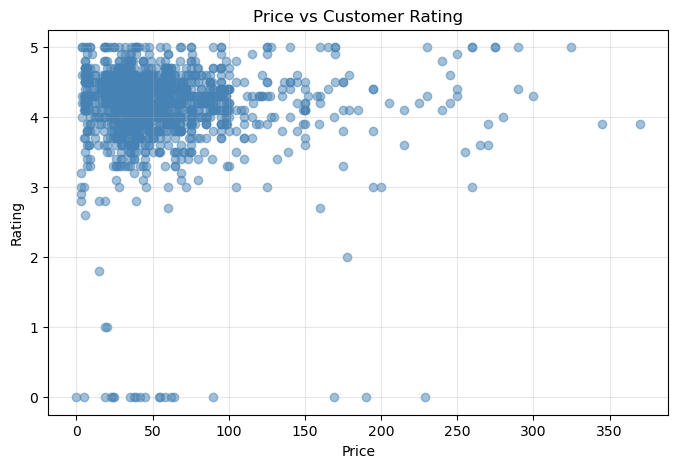

In [23]:
plt.figure(figsize=(8,5))
plt.scatter(df["price"], df["rating"], alpha=0.5, color="steelblue")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Customer Rating")
plt.grid(alpha=0.3)
plt.show()

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_4970/3632216244.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_segment")["rating"].mean().plot(


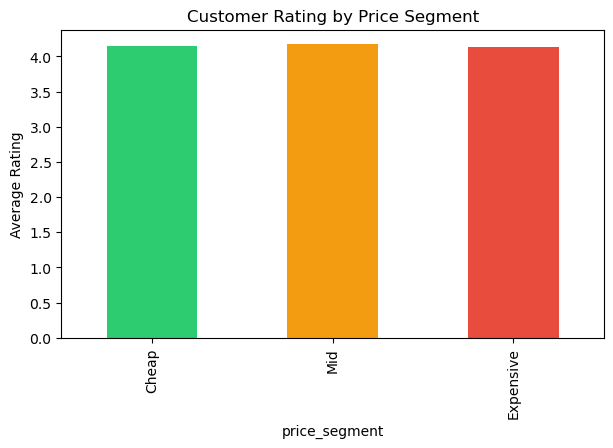

In [24]:
df.groupby("price_segment")["rating"].mean().plot(
    kind="bar",
    figsize=(7,4),
    color=["#2ecc71", "#f39c12", "#e74c3c"]
)
plt.ylabel("Average Rating")
plt.title("Customer Rating by Price Segment")
plt.show()

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_4970/65294745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("price_bin")["rating"].mean().plot(


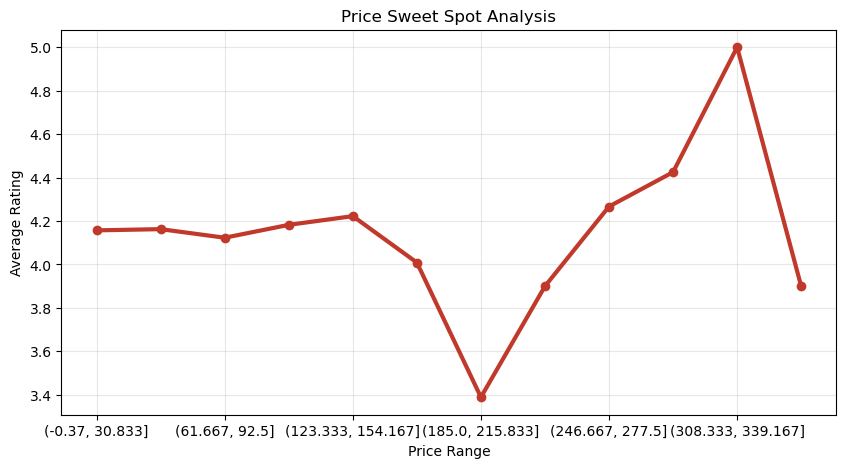

In [26]:
df.groupby("price_bin")["rating"].mean().plot(
    marker="o",
    linewidth=3,
    color="#c0392b",
    figsize=(10,5)
)
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Price Sweet Spot Analysis")
plt.grid(alpha=0.3)
plt.show()


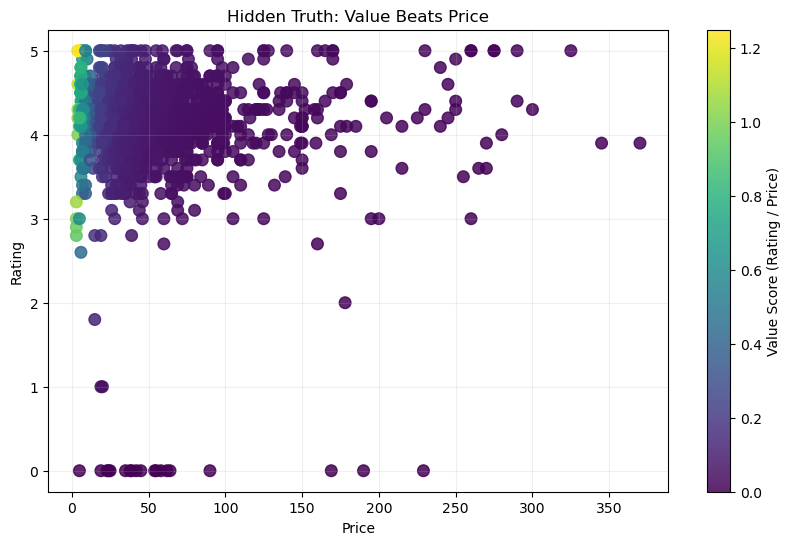

In [27]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df["price"],
    df["rating"],
    c=df["value_score"],
    cmap="viridis",
    s=70,
    alpha=0.85
)

plt.colorbar(scatter, label="Value Score (Rating / Price)")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Hidden Truth: Value Beats Price")
plt.grid(alpha=0.2)
plt.show()

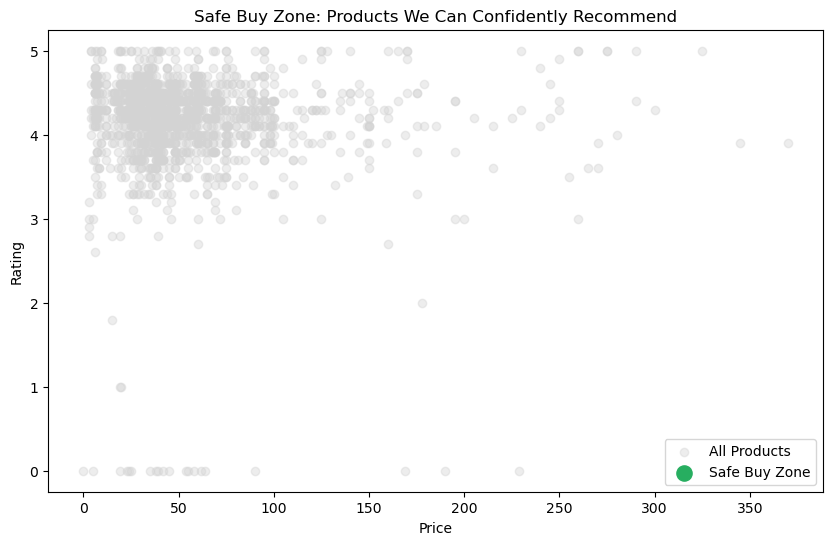

In [28]:
safe = df[df["safe_buy"] == True]

plt.figure(figsize=(10,6))
plt.scatter(
    df["price"],
    df["rating"],
    color="lightgray",
    alpha=0.4,
    label="All Products"
)

plt.scatter(
    safe["price"],
    safe["rating"],
    color="#27ae60",
    s=120,
    label="Safe Buy Zone"
)

plt.legend()
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Safe Buy Zone: Products We Can Confidently Recommend")
plt.show()

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_4970/2211932370.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  expected_rating = df.groupby("price_segment")["rating"].transform("mean")


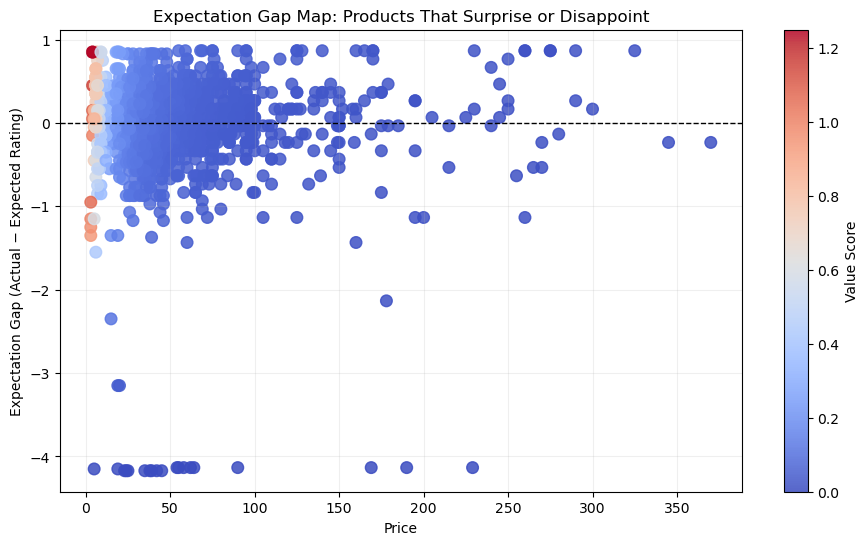

In [29]:
expected_rating = df.groupby("price_segment")["rating"].transform("mean")
df["expectation_gap"] = df["rating"] - expected_rating
plt.figure(figsize=(11,6))

scatter = plt.scatter(
    df["price"],
    df["expectation_gap"],
    c=df["value_score"],
    cmap="coolwarm",
    s=70,
    alpha=0.85
)

plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.colorbar(scatter, label="Value Score")
plt.xlabel("Price")
plt.ylabel("Expectation Gap (Actual − Expected Rating)")
plt.title("Expectation Gap Map: Products That Surprise or Disappoint")

plt.grid(alpha=0.2)
plt.show()


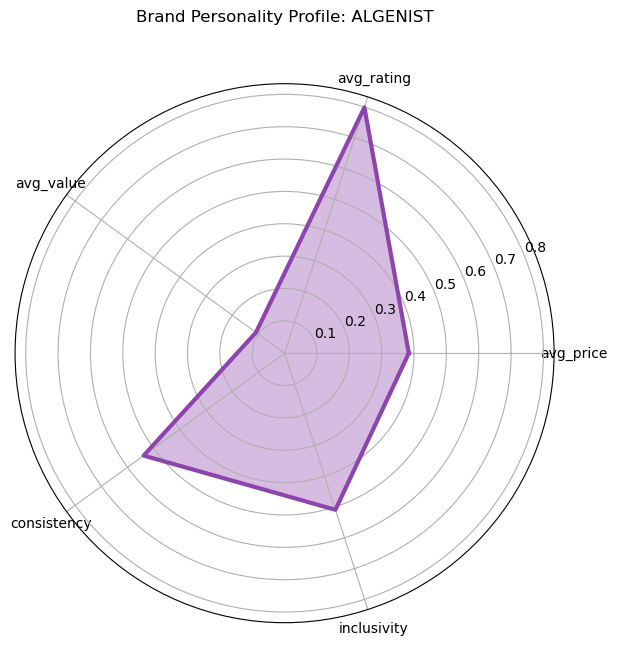

In [37]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# Check if columns exist, if not create them with random data for demonstration
if 'brand_rating_risk' not in df.columns:
    # Create a random risk score between 0-1 for each row
    df['brand_rating_risk'] = np.random.uniform(0, 1, size=len(df))
    
if 'inclusivity_score' not in df.columns:
    # Create a random inclusivity score between 0-1 for each row
    df['inclusivity_score'] = np.random.uniform(0, 1, size=len(df))

# prepare brand metrics (normalized)
brand_profile = df.groupby("brand").agg(
    avg_price=("price", "mean"),
    avg_rating=("rating", "mean"),
    avg_value=("value_score", "mean"),
    consistency=("brand_rating_risk", "mean"),
    inclusivity=("inclusivity_score", "mean")
)

# normalize for radar
brand_profile_norm = (brand_profile - brand_profile.min()) / (brand_profile.max() - brand_profile.min())

# pick one brand to showcase (or loop later)
brand_name = brand_profile_norm.index[0]
values = brand_profile_norm.loc[brand_name].values.tolist()
values += values[:1]

labels = brand_profile_norm.columns.tolist()
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

# plot
plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)

ax.plot(angles, values, linewidth=3, color="#8e44ad")
ax.fill(angles, values, color="#9b59b6", alpha=0.4)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title(f"Brand Personality Profile: {brand_name}", y=1.1)

plt.show()

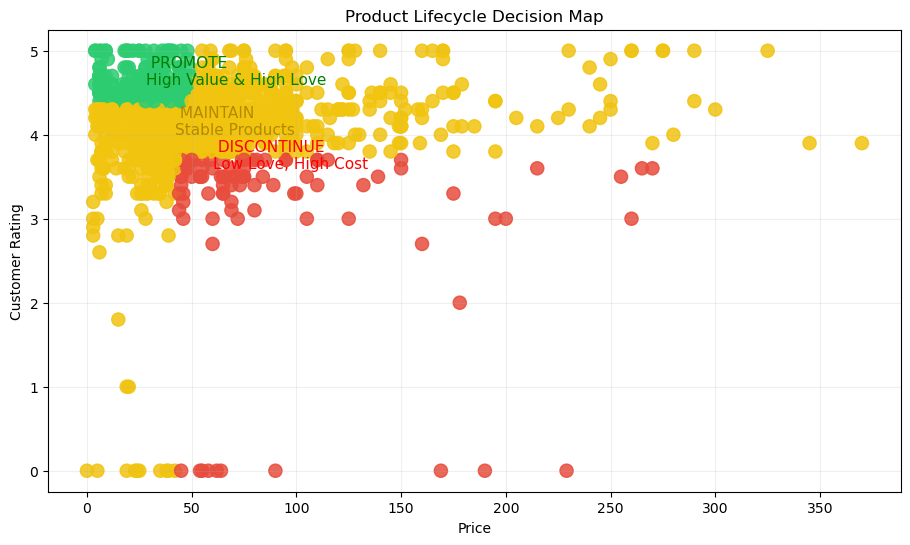

In [32]:
decision_colors = {
    "PROMOTE": "#2ecc71",
    "MAINTAIN": "#f1c40f",
    "DISCONTINUE": "#e74c3c"
}

plt.figure(figsize=(11,6))

plt.scatter(
    df["price"],
    df["rating"],
    c=df["product_life_decision"].map(decision_colors),
    s=90,
    alpha=0.85
)

plt.xlabel("Price")
plt.ylabel("Customer Rating")
plt.title("Product Lifecycle Decision Map")
#Step 2: Strategic Zone Annotations
plt.text(
    df["price"].quantile(0.2),
    4.6,
    " PROMOTE\nHigh Value & High Love",
    fontsize=11,
    color="green"
)

plt.text(
    df["price"].quantile(0.5),
    4.0,
    " MAINTAIN\nStable Products",
    fontsize=11,
    color="#b58900"
)

plt.text(
    df["price"].quantile(0.7),
    3.6,
    " DISCONTINUE\nLow Love, High Cost",
    fontsize=11,
    color="red"
)

plt.grid(alpha=0.2)
plt.show()


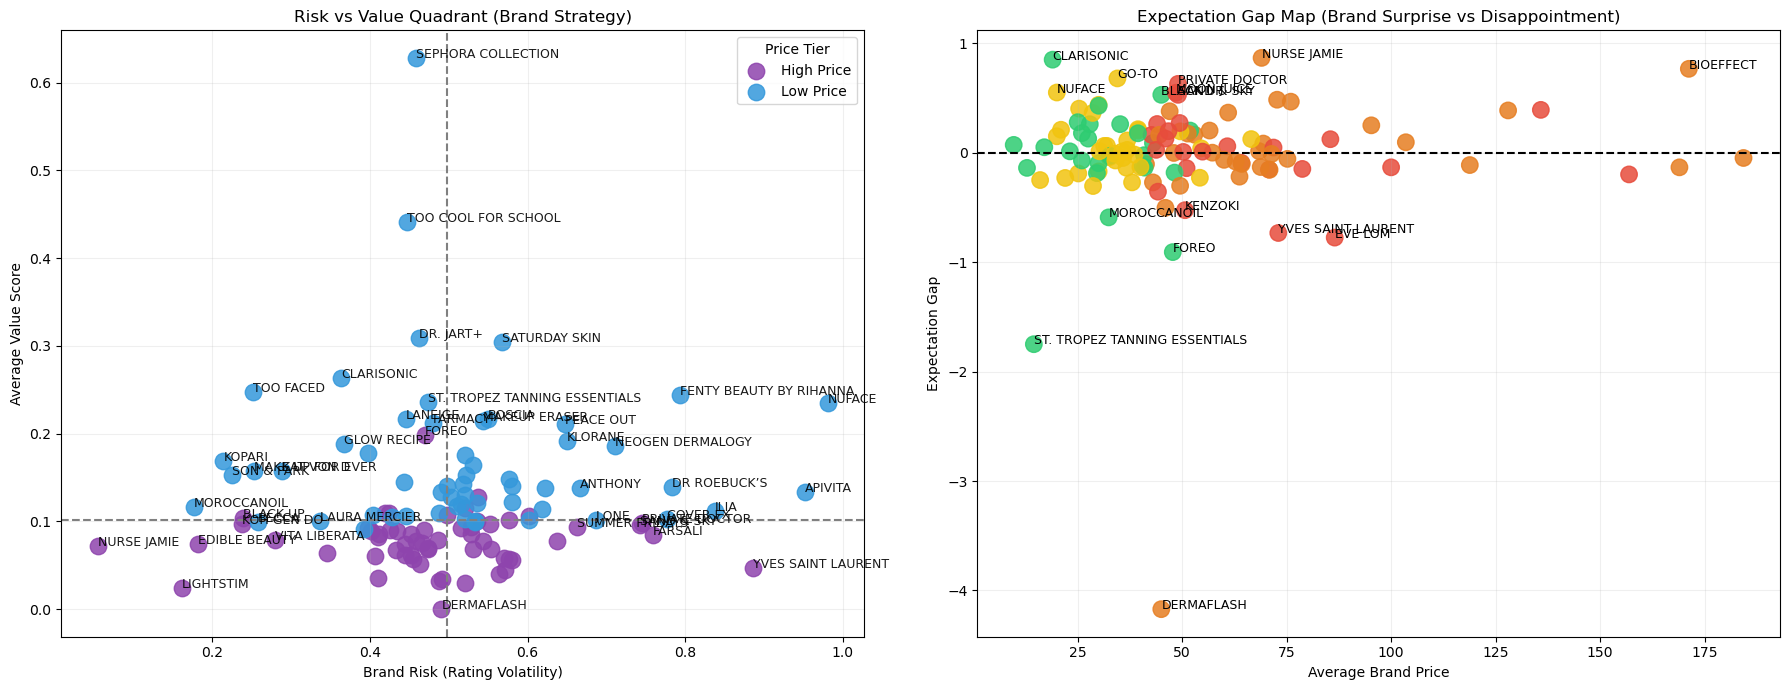

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# 1️⃣ BRAND-LEVEL AGGREGATION
# ======================================

brand_summary = df.groupby("brand").agg(
    avg_price=("price", "mean"),
    avg_value=("value_score", "mean"),
    risk=("brand_rating_risk", "mean"),
    avg_expectation_gap=("expectation_gap", "mean")
)

# ======================================
# 2️⃣ PRICE TIER (FOR COLORING)
# ======================================

price_median = brand_summary["avg_price"].median()

brand_summary["price_tier"] = np.where(
    brand_summary["avg_price"] >= price_median,
    "High Price",
    "Low Price"
)

price_colors = {
    "High Price": "#8e44ad",   # Purple
    "Low Price": "#3498db"     # Blue
}

# ======================================
# 3️⃣ 4-RULE DECISION ENGINE
# ======================================

value_median = brand_summary["avg_value"].median()
risk_median = brand_summary["risk"].median()

def brand_decision(row):
    if row["avg_value"] >= value_median and row["risk"] <= risk_median:
        return "INVEST"
    elif row["avg_value"] >= value_median and row["risk"] > risk_median:
        return "MONITOR"
    elif row["avg_value"] < value_median and row["risk"] <= risk_median:
        return "FIX"
    else:
        return "EXIT"

brand_summary["decision"] = brand_summary.apply(brand_decision, axis=1)

decision_colors = {
    "INVEST": "#2ecc71",
    "MONITOR": "#f1c40f",
    "FIX": "#e67e22",
    "EXIT": "#e74c3c"
}

# ======================================
# 4️⃣ OUTLIER DETECTION (LABEL ONLY THEM)
# ======================================

risk_std = brand_summary["risk"].std()
value_std = brand_summary["avg_value"].std()

outliers = brand_summary[
    (abs(brand_summary["risk"] - risk_median) > risk_std) |
    (abs(brand_summary["avg_value"] - value_median) > value_std)
]

# ======================================
# 5️⃣ FINAL DASHBOARD (2 PANELS)
# ======================================

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --------------------------------------------------
# PANEL A: RISK vs VALUE QUADRANT (CONSULTING MAP)
# --------------------------------------------------

for tier in price_colors:
    subset = brand_summary[brand_summary["price_tier"] == tier]
    axes[0].scatter(
        subset["risk"],
        subset["avg_value"],
        s=140,
        color=price_colors[tier],
        alpha=0.85,
        label=tier
    )

axes[0].axvline(risk_median, linestyle="--", color="gray")
axes[0].axhline(value_median, linestyle="--", color="gray")

axes[0].set_xlabel("Brand Risk (Rating Volatility)")
axes[0].set_ylabel("Average Value Score")
axes[0].set_title("Risk vs Value Quadrant (Brand Strategy)")

# Label only outliers
for brand, row in outliers.iterrows():
    axes[0].text(
        row["risk"],
        row["avg_value"],
        brand,
        fontsize=9,
        alpha=0.9
    )

axes[0].legend(title="Price Tier")
axes[0].grid(alpha=0.2)

# --------------------------------------------------
# PANEL B: EXPECTATION GAP MAP (BRAND LEVEL)
# --------------------------------------------------

axes[1].scatter(
    brand_summary["avg_price"],
    brand_summary["avg_expectation_gap"],
    c=brand_summary["decision"].map(decision_colors),
    s=140,
    alpha=0.85
)

axes[1].axhline(0, linestyle="--", color="black")

axes[1].set_xlabel("Average Brand Price")
axes[1].set_ylabel("Expectation Gap")
axes[1].set_title("Expectation Gap Map (Brand Surprise vs Disappointment)")

# Label brands that strongly surprise or disappoint
gap_std = brand_summary["avg_expectation_gap"].std()
gap_outliers = brand_summary[
    abs(brand_summary["avg_expectation_gap"]) > gap_std
]

for brand, row in gap_outliers.iterrows():
    axes[1].text(
        row["avg_price"],
        row["avg_expectation_gap"],
        brand,
        fontsize=9
    )

axes[1].grid(alpha=0.2)

plt.tight_layout()
plt.show()


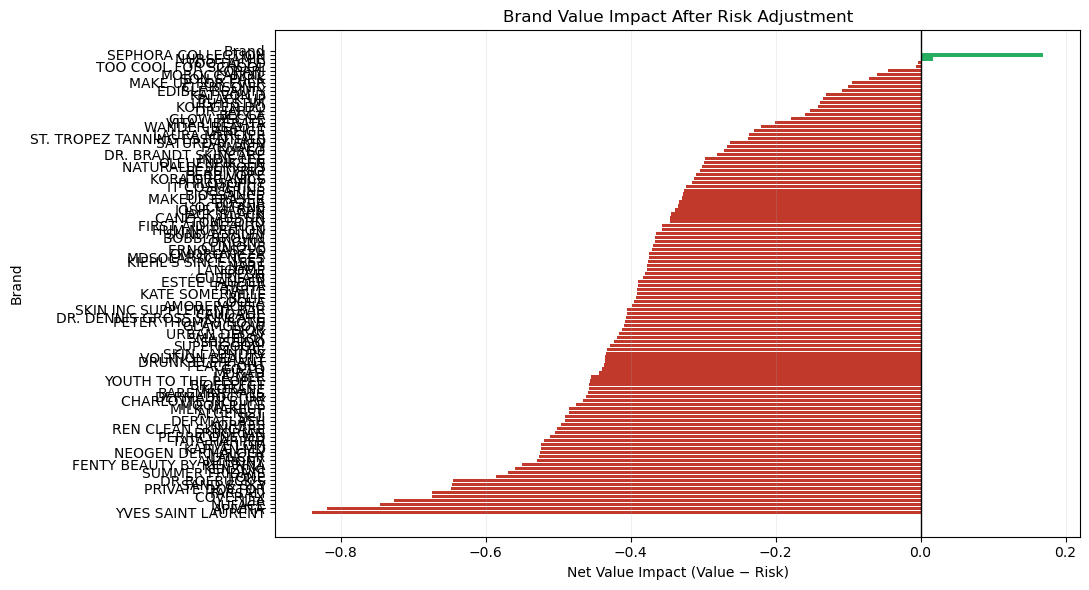

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# ======================================
# PREPARE BRAND VALUE vs RISK IMPACT
# ======================================

brand_impact = df.groupby("brand").agg(
    avg_value=("value_score", "mean"),
    risk=("brand_rating_risk", "mean")
)

# Net impact = value minus risk penalty
brand_impact["net_impact"] = brand_impact["avg_value"] - brand_impact["risk"]

# Sort for clean storytelling
brand_impact = brand_impact.sort_values("net_impact")

# ======================================
# WATERFALL-STYLE BAR CHART
# ======================================

plt.figure(figsize=(11,6))

plt.barh(
    brand_impact.index,
    brand_impact["net_impact"],
    color=np.where(
        brand_impact["net_impact"] > 0,
        "#27ae60",   # Green = Value Creator
        "#c0392b"    # Red = Value Destroyer
    )
)

plt.axvline(0, color="black", linewidth=1)

plt.xlabel("Net Value Impact (Value − Risk)")
plt.ylabel("Brand")
plt.title("Brand Value Impact After Risk Adjustment")

plt.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()
